[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Jensen_and_Nugent_2017/Fig_6.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Jensen_and_Nugent_2017/Fig_6.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Jensen_and_Nugent_2017/Fig_6.ipynb)

#### based on Fig. 6 from [Jensen and Nugent (JAS 74)  "_Condensational Growth of Drops Formed on Giant Sea-Salt Aerosol Particles_"](https://doi.org/10.1175/JAS-D-15-0370.1)


In [1]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [2]:
from PySDM_examples.Jensen_and_Nugent_2017 import Settings, Simulation
from open_atmos_jupyter_utils import show_plot
from PySDM_examples.Jensen_and_Nugent_2017.plotting import figure
from PySDM.physics import si

settings = Settings(aerosol="modified polluted", cloud_type="Cu", dt=.5 * si.s)
simulation = Simulation(settings, gccn=True)

In [3]:
output = simulation.run(
    n_steps=int(1800 * si.m / settings.vertical_velocity / settings.dt),
    steps_per_output_interval=5
)

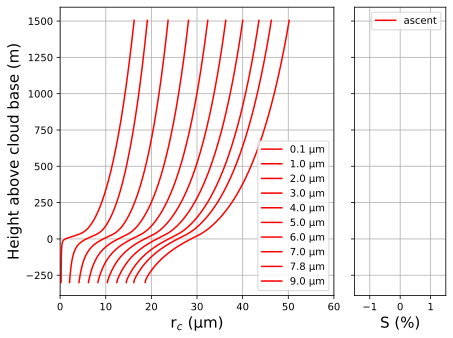

In [4]:
figure(
    output=output,
    settings=settings,
    simulation=simulation,
    plot_drops_with_dry_radii_um=(.1, 1, 2, 3, 4, 5, 6, 7, 8, 9),
    xlim_r_um=(0, 60),
    xlim_S_percent=(-1.5, 1.5)
)
show_plot("Fig_6.pdf")